In [1]:
import numpy as np
import pandas as pd

In [2]:
training_data = pd.read_csv("hackerrank-predict-email-opens-dataset/training_dataset.csv")

In [3]:
training_data.head()

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,AR+tMy3H/E+Re8Id20zUIz+amJkv6KU12o+BrgIDin0=,DQ/4I+GIOz2ZoIiK0Lg0AkwnI35XotghgUK/MYc101I=,mail_category_2,mail_type_1,1463497837,1.463541e+09,NaN,NaN,1.459520e+09,1432533023,...,0,0,0,0,13,0,0,13,0,False
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1461357640,NaN,NaN,NaN,1.461210e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1463499639,NaN,NaN,NaN,1.463411e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463182983,NaN,NaN,NaN,1.462768e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,mail_type_1,1461855019,NaN,NaN,NaN,1.461248e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False


## Data Preprocessing

### Missing Values

- Drop the columns having more that 70-75% missing values.

In [4]:
training_data.isnull().sum()

user_id                                      0
mail_id                                      0
mail_category                              425
mail_type                                  425
sent_time                                    0
open_time                               324701
click_time                              458964
unsubscribe_time                        484090
last_online                                577
hacker_created_at                            0
hacker_timezone                           6939
clicked                                      0
contest_login_count                          0
contest_login_count_1_days                   0
contest_login_count_30_days                  0
contest_login_count_365_days                 0
contest_login_count_7_days                   0
contest_participation_count                  0
contest_participation_count_1_days           0
contest_participation_count_30_days          0
contest_participation_count_365_days         0
contest_parti

- Drop the columns 'click_time' and 'unsubscribe_time as both columns have more than 75% missing values.

In [5]:
training_data.drop(['click_time', 'unsubscribe_time'], axis=1, inplace=True)

- Replace the missing objects with most frequent object in 'mail_category' and 'mail_type'. 

In [6]:
training_data['mail_category'].fillna(training_data['mail_category'].value_counts().index[0], inplace=True)
training_data['mail_type'].fillna(training_data['mail_type'].value_counts().index[0],inplace=True)

- Fill the missing values in 'hacker_timezone' with the most frequent value.

In [7]:
training_data['hacker_timezone'].fillna(training_data['hacker_timezone'].value_counts().index[0], inplace=True)

- Fill the the missing value in 'last_online' and 'open_time' with the mean.

In [8]:
training_data['last_online'].fillna(training_data['last_online'].mean(), inplace=True)
training_data['open_time'].fillna(training_data['open_time'].mean(), inplace=True)


In [9]:
training_data.isnull().sum()

user_id                                 0
mail_id                                 0
mail_category                           0
mail_type                               0
sent_time                               0
open_time                               0
last_online                             0
hacker_created_at                       0
hacker_timezone                         0
clicked                                 0
contest_login_count                     0
contest_login_count_1_days              0
contest_login_count_30_days             0
contest_login_count_365_days            0
contest_login_count_7_days              0
contest_participation_count             0
contest_participation_count_1_days      0
contest_participation_count_30_days     0
contest_participation_count_365_days    0
contest_participation_count_7_days      0
forum_comments_count                    0
forum_count                             0
forum_expert_count                      0
forum_questions_count             

### Remove Outliers

In [10]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sent_time,486048.0,1.460378e+09,2.143160e+06,1.455281e+09,1.458833e+09,1.460575e+09,1.462287e+09,1.463529e+09
open_time,486048.0,1.460278e+09,1.295805e+06,1.455281e+09,1.460278e+09,1.460278e+09,1.460278e+09,1.468109e+09
last_online,486048.0,1.459161e+09,3.298312e+06,1.376045e+09,1.457692e+09,1.459525e+09,1.461235e+09,1.463524e+09
hacker_created_at,486048.0,1.439918e+09,2.278764e+07,1.336762e+09,1.429803e+09,1.448939e+09,1.457395e+09,1.463368e+09
hacker_timezone,486048.0,5.427908e+03,1.749373e+04,-4.320000e+04,-1.440000e+04,1.800000e+04,1.800000e+04,5.040000e+04
contest_login_count,486048.0,3.696357e+00,7.689379e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.230000e+02
contest_login_count_1_days,486048.0,9.673942e-03,1.073433e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
contest_login_count_30_days,486048.0,5.245161e-01,9.043532e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01
contest_login_count_365_days,486048.0,2.885806e+00,5.626671e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,9.400000e+01
contest_login_count_7_days,486048.0,1.621980e-01,4.431271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


In [11]:
min_threshold, max_threshold = training_data.open_time.quantile([0.001, 0.999])

In [12]:
training_data = training_data[(training_data['open_time'] > min_threshold) & (training_data['open_time'] < max_threshold)]

### Encoding Categorical Attributes

In [13]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [14]:
# Extract Categorical Attributes
cat_training_data = training_data.select_dtypes(include=['object']).copy()

# encode the categorical attributes
training_data = training_data.apply(encode.fit_transform)

In [62]:
training_data.shape

(485074, 47)

#### Seperate the target / label column 

In [16]:
label = training_data['opened']

training_data.drop('opened', inplace=True, axis=1)

### Scaling Numerical Features

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance

cols = training_data.select_dtypes(include=['float64', 'int64']).columns
training_data = scaler.fit_transform(training_data.select_dtypes(include=['float64','int64']))



#### Turn the results back into Dataframe

In [20]:
training_data = pd.DataFrame(training_data, columns=cols)

In [21]:
training_data.head()

,sent_time,open_time,last_online,hacker_created_at,hacker_timezone,clicked,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,1.698032,2.991051,-0.047902,-0.766197,0.716916,-0.242285,-0.350656,-0.090156,-0.579966,-0.336388,...,-0.070419,-0.205077,-0.293791,-0.151399,-0.416999,-0.115932,-0.451397,-0.388418,-0.327929,-0.063548
1,0.404335,-0.047239,0.801996,-0.778146,-1.784877,-0.242285,-0.090689,-0.090156,0.525455,0.020542,...,-0.070419,0.180417,0.062474,-0.151399,0.646583,-0.115932,1.703784,0.848708,0.204803,-0.063548
2,1.699808,-0.047239,1.973915,-0.750354,0.716916,-0.242285,-0.090689,-0.090156,-0.579966,0.020542,...,-0.070419,-0.205077,-0.293791,-0.151399,-0.371417,-0.115932,-0.301035,-0.335399,-0.327929,-0.063548
3,1.506375,-0.047239,1.586101,-0.778146,-1.784877,-0.242285,-0.090689,-0.090156,-0.579966,0.020542,...,-0.070419,-0.205077,0.062474,-0.151399,0.676971,-0.115932,-0.000313,0.884054,-0.327929,-0.063548
4,0.653628,-0.047239,0.826000,-0.752502,0.716916,-0.242285,0.169279,-0.090156,-0.579966,0.377473,...,-0.070419,-0.076579,0.084740,-0.151399,0.038822,-0.115932,-0.451397,0.141779,-0.327929,-0.063548


### Dataset Partition

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(training_data, label, test_size = 0.25, random_state=2)

## Model Training with all the features

In [27]:
from sklearn import tree


In [28]:
DT_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
from sklearn import metrics

In [30]:
accuracy = metrics.accuracy_score(Y_test, DT_Classifier.predict(X_test))

In [33]:
confustion_matrix = metrics.confusion_matrix(Y_test, DT_Classifier.predict(X_test))

In [34]:
confustion_matrix

array([[81302,     0],
       [    0, 39967]], dtype=int64)

## Model Training with the selected features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(training_data, label)

# extract important feature
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': training_data.columns, 'importance': score})

importances = importances.sort_values('importance', ascending=False).set_index('feature')



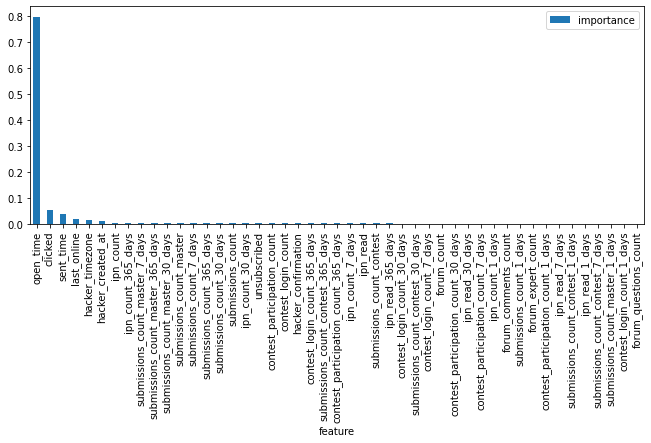

In [35]:
# plot importances
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (11,4)
importances.plot.bar()

In [38]:
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# Create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select = 10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['sent_time',
 'open_time',
 'last_online',
 'hacker_created_at',
 'hacker_timezone',
 'clicked',
 'ipn_count',
 'submissions_count_7_days',
 'submissions_count_master_7_days',
 'unsubscribed']

In [46]:
upd_DT_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
upd_DT_Classifier.fit(X_train[selected_features], Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
upd_accuracy = metrics.accuracy_score(Y_test, upd_DT_Classifier.predict(X_test[selected_features]))

In [49]:
upd_accuracy

1.0

In [50]:
upd_confusion_matrix = metrics.confusion_matrix(Y_test, upd_DT_Classifier.predict(X_test[selected_features]))

In [51]:
upd_confusion_matrix

array([[81302,     0],
       [    0, 39967]], dtype=int64)

In [52]:
test_data = pd.read_csv('hackerrank-predict-email-opens-dataset/test_dataset.csv')

In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207424 entries, 0 to 207423
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   user_id                               207424 non-null  object 
 1   mail_id                               207424 non-null  object 
 2   mail_category                         207417 non-null  object 
 3   mail_type                             207417 non-null  object 
 4   sent_time                             207424 non-null  int64  
 5   last_online                           207291 non-null  float64
 6   hacker_created_at                     207424 non-null  int64  
 7   hacker_timezone                       199784 non-null  float64
 8   contest_login_count                   207424 non-null  int64  
 9   contest_login_count_1_days            207424 non-null  int64  
 10  contest_login_count_30_days           207424 non-null  int64  
 11  

In [56]:
test_data.isnull().sum()

user_id                                    0
mail_id                                    0
mail_category                              7
mail_type                                  7
sent_time                                  0
last_online                              133
hacker_created_at                          0
hacker_timezone                         7640
contest_login_count                        0
contest_login_count_1_days                 0
contest_login_count_30_days                0
contest_login_count_365_days               0
contest_login_count_7_days                 0
contest_participation_count                0
contest_participation_count_1_days         0
contest_participation_count_30_days        0
contest_participation_count_365_days       0
contest_participation_count_7_days         0
forum_comments_count                       0
forum_count                                0
forum_expert_count                         0
forum_questions_count                      0
hacker_con

In [60]:
# Missing Values

test_data['mail_category'].fillna(test_data['mail_category'].value_counts().index[0], inplace=True)
test_data['mail_type'].fillna(test_data['mail_type'].value_counts().index[0],inplace=True)
test_data['last_online'].fillna(test_data['last_online'].mean(), inplace=True)
test_data['hacker_timezone'].fillna(test_data['hacker_timezone'].value_counts().index[0],inplace=True)
